## CartPole Skating

> **Problem**: Hvis Peter vil undslippe ulven, skal han kunne bevæge sig hurtigere end den. Vi vil se, hvordan Peter kan lære at skate, især at holde balancen, ved hjælp af Q-Learning.

Først skal vi installere gym og importere de nødvendige biblioteker:


In [1]:
#code block 1

## Opret et cartpole-miljø


In [ ]:
#code block 2

For at se, hvordan miljøet fungerer, lad os køre en kort simulering i 100 trin.


In [ ]:
#code block 3

Under simulering skal vi indhente observationer for at beslutte, hvordan vi skal handle. Faktisk returnerer `step`-funktionen os de aktuelle observationer, belønningsfunktionen og `done`-flaget, der angiver, om det giver mening at fortsætte simuleringen eller ej:


In [ ]:
#code block 4

Vi kan få minimums- og maksimumsværdien af disse tal:


In [5]:
#code block 5

[-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38]
[4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38]


In [6]:
#code block 6

Lad os også udforske en anden diskretiseringsmetode ved hjælp af bins:


In [7]:
#code block 7

Sample bins for interval (-5,5) with 10 bins
 [-5. -4. -3. -2. -1.  0.  1.  2.  3.  4.  5.]


Lad os nu køre en kort simulation og observere disse diskrete miljøværdier.


In [8]:
#code block 8

(0, 0, -2, -2)
(0, 1, -2, -5)
(0, 2, -3, -8)
(0, 3, -5, -11)
(0, 3, -7, -14)
(0, 4, -10, -17)
(0, 3, -14, -15)
(0, 3, -17, -12)
(0, 3, -20, -16)
(0, 4, -23, -19)


## Q-Tabellestruktur


In [12]:
#code block 9

In [13]:
#code block 10

In [14]:
#code block 11

0: 22.0, alpha=0.3, epsilon=0.9
5000: 70.1384, alpha=0.3, epsilon=0.9
10000: 121.8586, alpha=0.3, epsilon=0.9
15000: 149.6368, alpha=0.3, epsilon=0.9
20000: 168.2782, alpha=0.3, epsilon=0.9
25000: 196.7356, alpha=0.3, epsilon=0.9
30000: 220.7614, alpha=0.3, epsilon=0.9
35000: 233.2138, alpha=0.3, epsilon=0.9
40000: 248.22, alpha=0.3, epsilon=0.9
45000: 264.636, alpha=0.3, epsilon=0.9
50000: 276.926, alpha=0.3, epsilon=0.9
55000: 277.9438, alpha=0.3, epsilon=0.9
60000: 248.881, alpha=0.3, epsilon=0.9
65000: 272.529, alpha=0.3, epsilon=0.9
70000: 281.7972, alpha=0.3, epsilon=0.9
75000: 284.2844, alpha=0.3, epsilon=0.9
80000: 269.667, alpha=0.3, epsilon=0.9
85000: 273.8652, alpha=0.3, epsilon=0.9
90000: 278.2466, alpha=0.3, epsilon=0.9
95000: 269.1736, alpha=0.3, epsilon=0.9


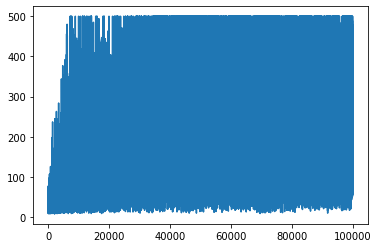

In [20]:
plt.plot(rewards)

Fra denne graf er det ikke muligt at sige noget, fordi længden af træningssessioner varierer meget på grund af den stokastiske træningsproces. For at give mere mening til denne graf kan vi beregne **løbende gennemsnit** over en række eksperimenter, lad os sige 100. Dette kan nemt gøres ved hjælp af `np.convolve`:


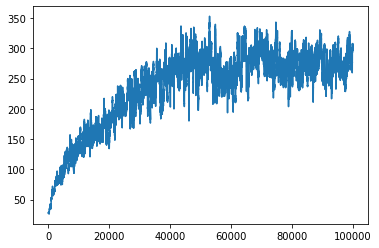

In [22]:
#code block 12

## Varierende hyperparametre og se resultatet i praksis

Nu ville det være interessant at se, hvordan den trænede model faktisk opfører sig. Lad os køre simuleringen, og vi vil følge den samme strategi for valg af handlinger som under træningen: sampling i henhold til sandsynlighedsfordelingen i Q-Tabellen:


In [23]:
# code block 13

## Gem resultatet som en animeret GIF

Hvis du vil imponere dine venner, kan du sende dem det animerede GIF-billede af balancepinden. For at gøre dette kan vi bruge `env.render` til at producere et billedramme og derefter gemme dem som en animeret GIF ved hjælp af PIL-biblioteket:


In [26]:
from PIL import Image
obs = env.reset()
done = False
i=0
ims = []
while not done:
   s = discretize(obs)
   img=env.render(mode='rgb_array')
   ims.append(Image.fromarray(img))
   v = probs(np.array([Qbest.get((s,a),0) for a in actions]))
   a = random.choices(actions,weights=v)[0]
   obs,_,done,_ = env.step(a)
   i+=1
env.close()
ims[0].save('images/cartpole-balance.gif',save_all=True,append_images=ims[1::2],loop=0,duration=5)
print(i)

360



---

**Ansvarsfraskrivelse**:  
Dette dokument er blevet oversat ved hjælp af AI-oversættelsestjenesten [Co-op Translator](https://github.com/Azure/co-op-translator). Selvom vi bestræber os på nøjagtighed, skal du være opmærksom på, at automatiserede oversættelser kan indeholde fejl eller unøjagtigheder. Det originale dokument på dets oprindelige sprog bør betragtes som den autoritative kilde. For kritisk information anbefales professionel menneskelig oversættelse. Vi påtager os ikke ansvar for eventuelle misforståelser eller fejltolkninger, der opstår som følge af brugen af denne oversættelse.
